## Importing required libraries

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

## Load the datasets from Git directly

In [143]:
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv") 

In [145]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [146]:
# Regions data
# https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv

# Province data
# https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv

# Total data
# https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv


regions_df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")

province_df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")

total_df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")

In [147]:
# Renaming columns for the sake of readability
new_column_names_dict = {
    'data': 'date',
    'stato': 'state',
    'codice_regione': 'region code',
    'denominazione_regione': 'region name',
    'lat': 'latitude',
    'long': 'longitude',
    'ricoverati_con_sintomi': 'hospitalized_with_symptoms',
    'terapia_intensiva': 'intensive care',
    'totale_ospedalizzati': 'total hospitalized',
    'isolamento_domiciliare': 'home isolation',
    'totale_positivi': 'total positives', 
    'variazione_totale_positivi': 'total positive change',
    'nuovi_positivi': 'new positives',
    'dimessi_guariti': 'discharged healed',
    'deceduti': 'deceased',
    'totale_casi': 'total cases',
    'tamponi': 'tampons',
    'casi_testati': 'total tests',
    'note_it': 'notes in italian',
    'note_en': 'notes in english',
    'codice_provincia': '',
    'denominazione_provincia': 'province name',
    'sigla_provincia': 'province abbreviation'
    
}

# Function for renaming columns and reformmating the date
def preprocess_df(df):
    df.rename(columns = new_column_names_dict, inplace = True)
    df['date'] = pd.to_datetime(df.date).apply(lambda x: x.date())
    df['date'] = pd.to_datetime(df.date)
    
    return df

In [148]:
regions_df = preprocess_df(regions_df)

regions_df.tail(2)

,date,state,region code,region name,latitude,longitude,hospitalized_with_symptoms,intensive care,total hospitalized,home isolation,total positives,total positive change,new positives,discharged healed,deceased,total cases,tampons,total tests,notes in italian,notes in english
2413,2020-06-17,ITA,2,Valle d'Aosta,45.737503,7.320149,5,0,5,3,8,-2,0,1039,144,1191,16918,12996.0,NaN,NaN
2414,2020-06-17,ITA,5,Veneto,45.434905,12.338452,37,1,38,642,680,-38,4,16558,1987,19225,837394,379280.0,NaN,NaN


In [149]:
province_df = preprocess_df(province_df)

province_df.columns = ['date', 'state', 'region code', 'region name', 'province code', 'province name',
       'province abbreviation', 'latitude', 'longitude', 'total cases',
       'notes in italian', 'notes in english']

In [150]:
province_df.tail(2)

,date,state,region code,region name,province code,province name,province abbreviation,latitude,longitude,total cases,notes in italian,notes in english
14718,2020-06-17,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2855,NaN,NaN
14719,2020-06-17,ITA,5,Veneto,999,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,343,NaN,NaN


In [151]:
total_df = preprocess_df(total_df)
total_df.tail(2)

,date,state,hospitalized_with_symptoms,intensive care,total hospitalized,home isolation,total positives,total positive change,new positives,discharged healed,deceased,total cases,tampons,total tests,notes in italian,notes in english
113,2020-06-16,ITA,3301,177,3478,21091,24569,-1340,210,178526,34405,237500,4695707,2891846.0,NaN,NaN
114,2020-06-17,ITA,3113,163,3276,20649,23925,-644,329,179455,34448,237828,4773408,2925803.0,dc-IT-0052,dc-EN-0052


## Barplot using Seaborn

### For total cases

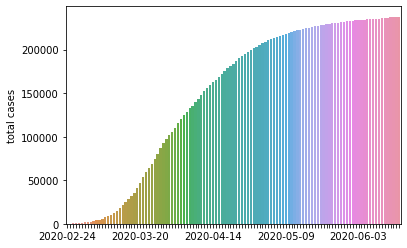

In [21]:
# Get all the unique dates
dlist =  pd.to_datetime(total_df['date']).apply(lambda x: x.date()).unique()
# print(len(dlist))

plot_ = sns.barplot(dlist, total_df['total cases'])
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 25 == 0:  # every 25th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

## For number of positive cases

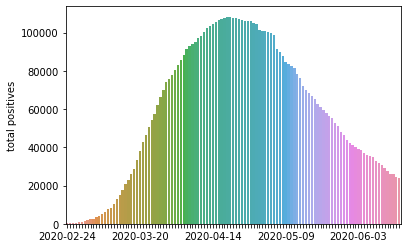

In [22]:
plot_ = sns.barplot(dlist, total_df['total positives'])
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 25 == 0:  # every 25th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

## For change in number of positive cases

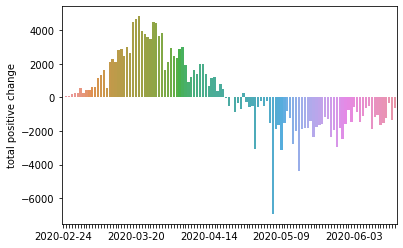

In [23]:
plot_ = sns.barplot(dlist, total_df['total positive change'])
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 25 == 0:  # every 25th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Multiple subplots using Seaborn

['hospitalized_with_symptoms', 'intensive care', 'total hospitalized', 'home isolation', 'total positives', 'total positive change', 'new positives', 'discharged healed', 'deceased', 'total cases', 'tampons', 'total tests']


<Figure size 432x288 with 0 Axes>

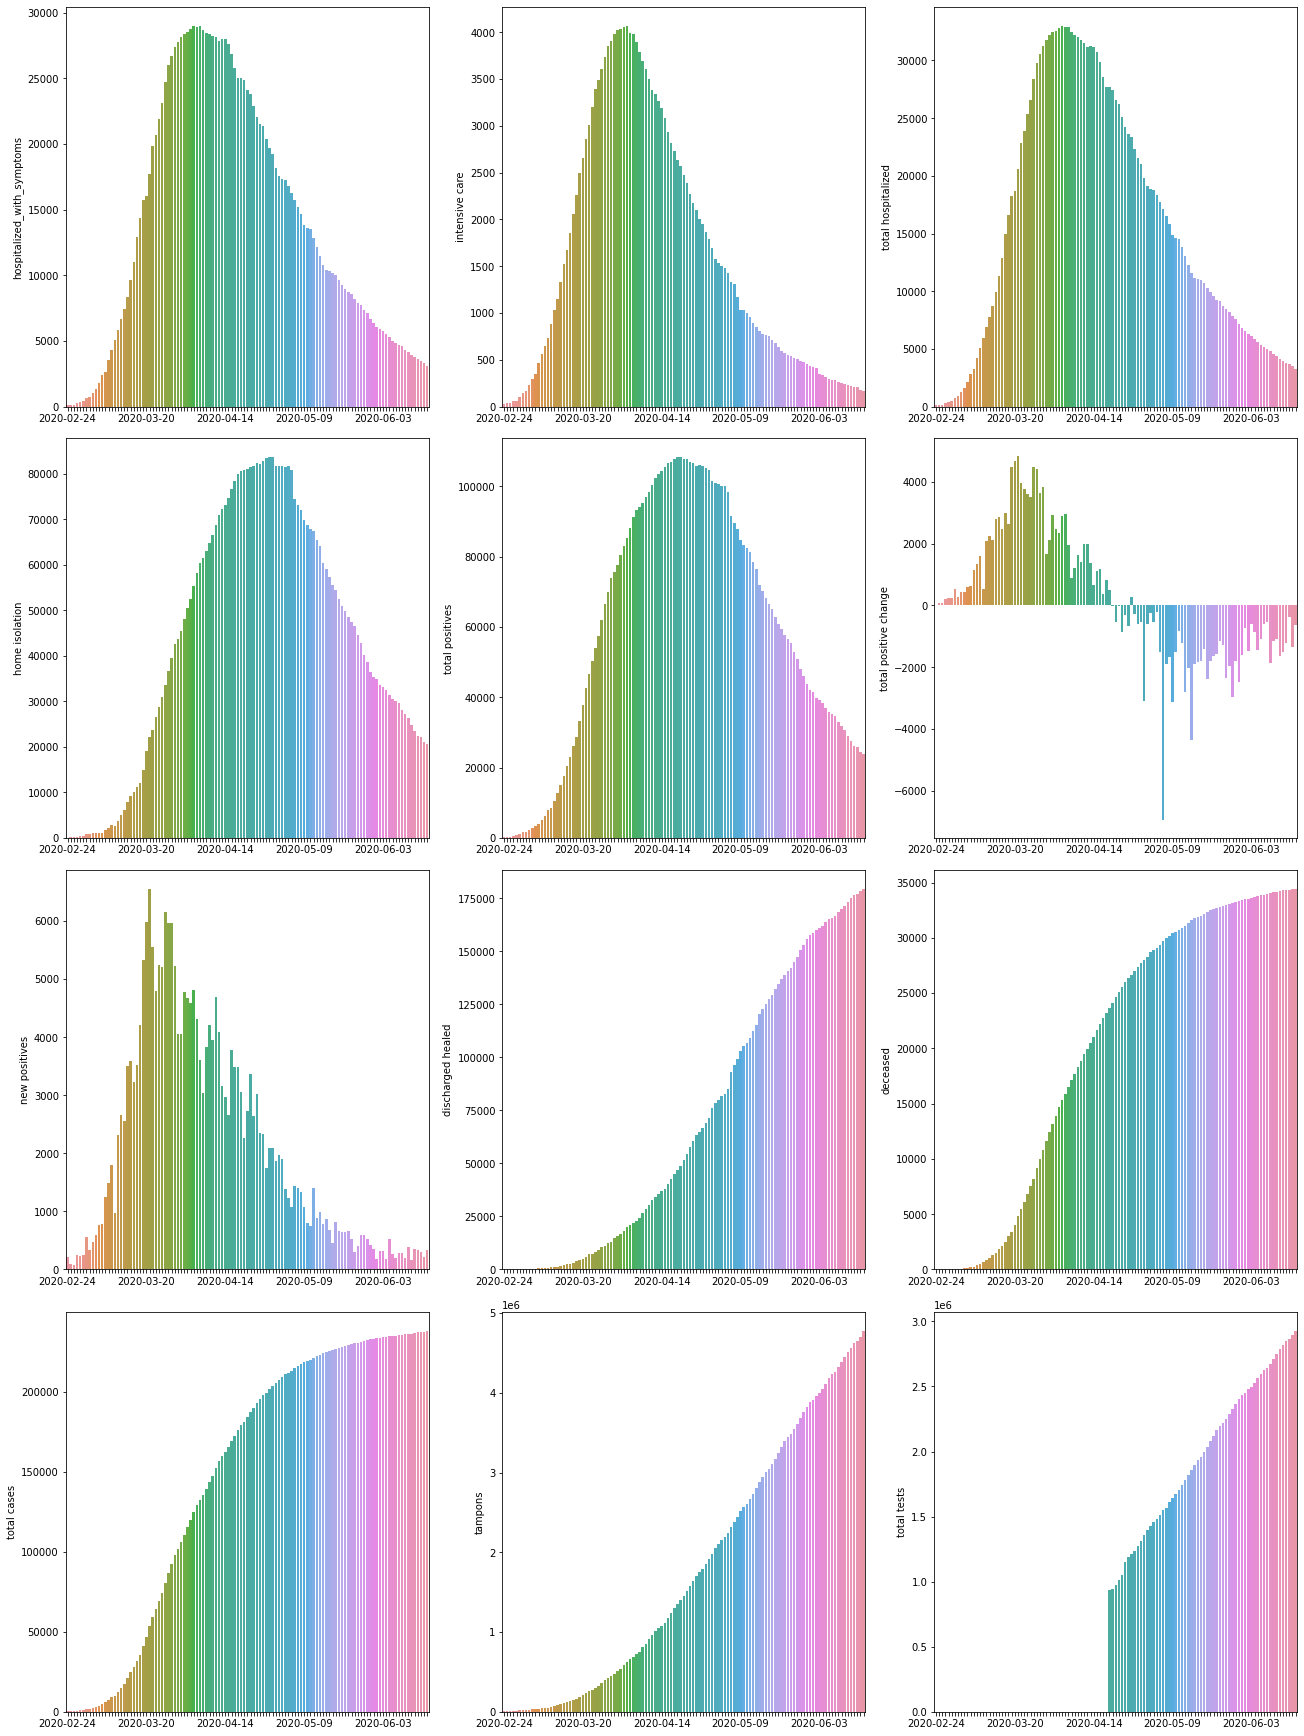

In [63]:
f_list = ['date', 'state', 'notes in italian', 'notes in english']

# Filter out the columns that we do not need
col_list = [i for i in total_df.columns if i not in f_list]

print(col_list)

num_plots = len(col_list)
total_cols = 3
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(6*total_cols, 6*total_rows), constrained_layout=True)

index = 0
for col in col_list:
    
    row = index //total_cols
    pos = index % total_cols
    
    plot_ = sns.barplot(dlist, total_df[col], ax=axs[row][pos])
    
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 25 == 0:  # every 25th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    index += 1

plt.show()
plt.tight_layout()

## Scatterplot using Seaborn
 
A scatterplot is perhaps the most common example of visualizing relationships between two variables. Each point shows an observation in the dataset and these observations are represented by dot-like structures. The plot shows the joint distribution of two variables using a cloud of points.

To draw the scatter plot, we’ll be using the relplot() function of the seaborn library. It is a figure-level role for visualizing statistical relationships. By default, using a relplot produces a scatter plot.

In [62]:
total_df.head(2)

,date,state,hospitalized_with_symptoms,intensive care,total hospitalized,home isolation,total positives,total positive change,new positives,discharged healed,deceased,total cases,tampons,total tests,notes in italian,notes in english
0,2020-02-24,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN


<Figure size 432x288 with 0 Axes>

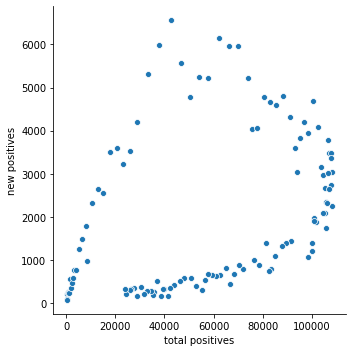

In [64]:
sns.relplot(x="total positives", y="new positives", data = total_df)
plt.show()

### Next, if we want to see the tag associated with the data, we can use the below code:

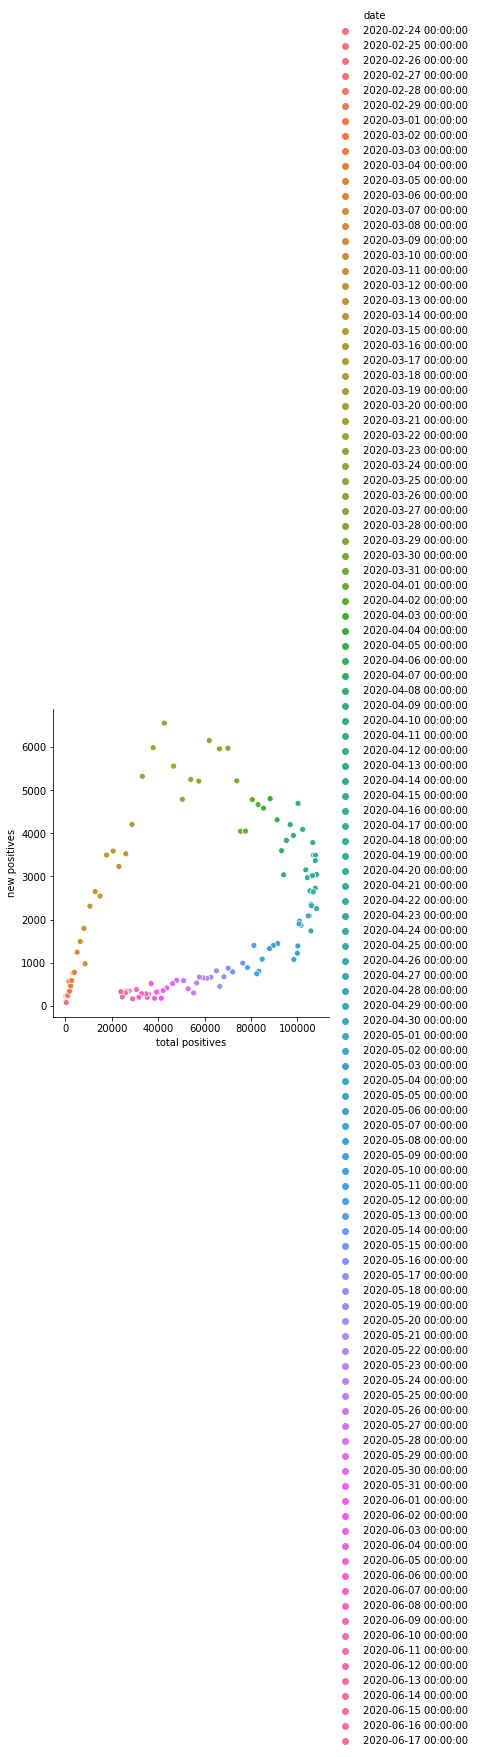

In [65]:
sns.relplot(x="total positives", y="new positives", hue = "date", data = total_df)
plt.show()

In the above plot, the hue semantic is categorical. That’s why it has a different color palette. If the hue semantic is numeric, then the coloring becomes sequential.

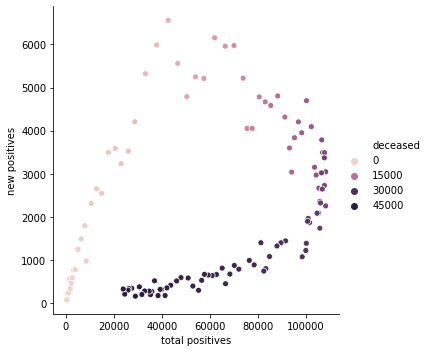

In [66]:
sns.relplot(x="total positives", y="new positives", hue = "deceased", data = total_df)
plt.show()

### We can also change the size of each point:

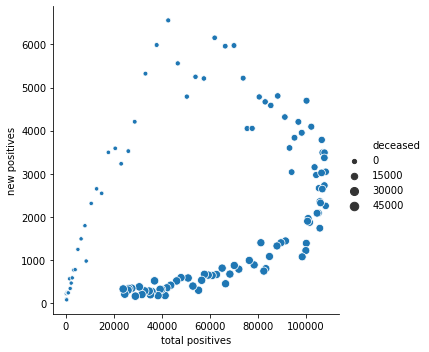

In [67]:
sns.relplot(x="total positives", y="new positives", size = "deceased", data = total_df)
plt.show()

## Plotting Categorical Data

## Boxplot using seaborn

Another kind of plot we can draw is a boxplot which shows three quartile values of the distribution along with the end values. Each value in the boxplot corresponds to actual observation in the data. Let’s draw the boxplot now-

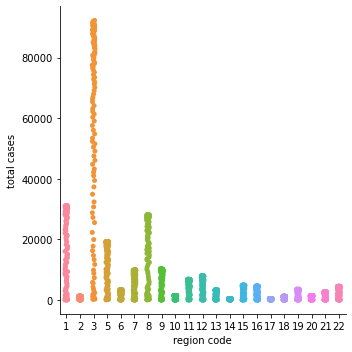

In [128]:
sns.catplot(x="region code", y="total cases", data = regions_df)
plt.show()

Since we can see that the plot is scattered, so to handle that, we can set the jitter to false. Jitter is the deviation from the true value. So, we’ll set the jitter to false by using another parameter.

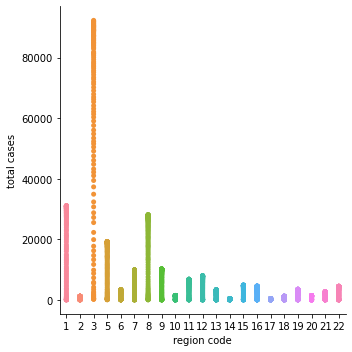

In [131]:
sns.catplot(x="region code", y="total cases", jitter = False,  data=regions_df)
plt.show()

In [90]:
# Only last five rows, we can also use tail() method
#total_df['date'][-5:]

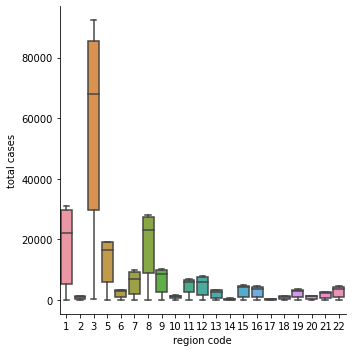

    region code            region name
12            1               Piemonte
19            2          Valle d'Aosta
9             3              Lombardia
20            5                 Veneto
6             6  Friuli Venezia Giulia
8             7                Liguria
5             8         Emilia-Romagna
16            9                Toscana
18           10                 Umbria
10           11                 Marche
7            12                  Lazio
0            13                Abruzzo
11           14                 Molise
4            15               Campania
13           16                 Puglia
1            17             Basilicata
3            18               Calabria
15           19                Sicilia
14           20               Sardegna
2            21           P.A. Bolzano
17           22            P.A. Trento


In [89]:
sns.catplot(x="region code", y="total cases", kind = "box", data = regions_df)
plt.show()


r_df = regions_df[['region code', 'region name']].copy()

print(r_df.drop_duplicates().sort_values('region code'))

#print(regions_df[['region code', 'region name']])

## Hue Plot
Next, if we want to introduce another variable or another dimension in our plot, we can use the hue parameter just like we used in the above section. Let’s say we want to see the gender distribution in the plot of education and avg_training_score

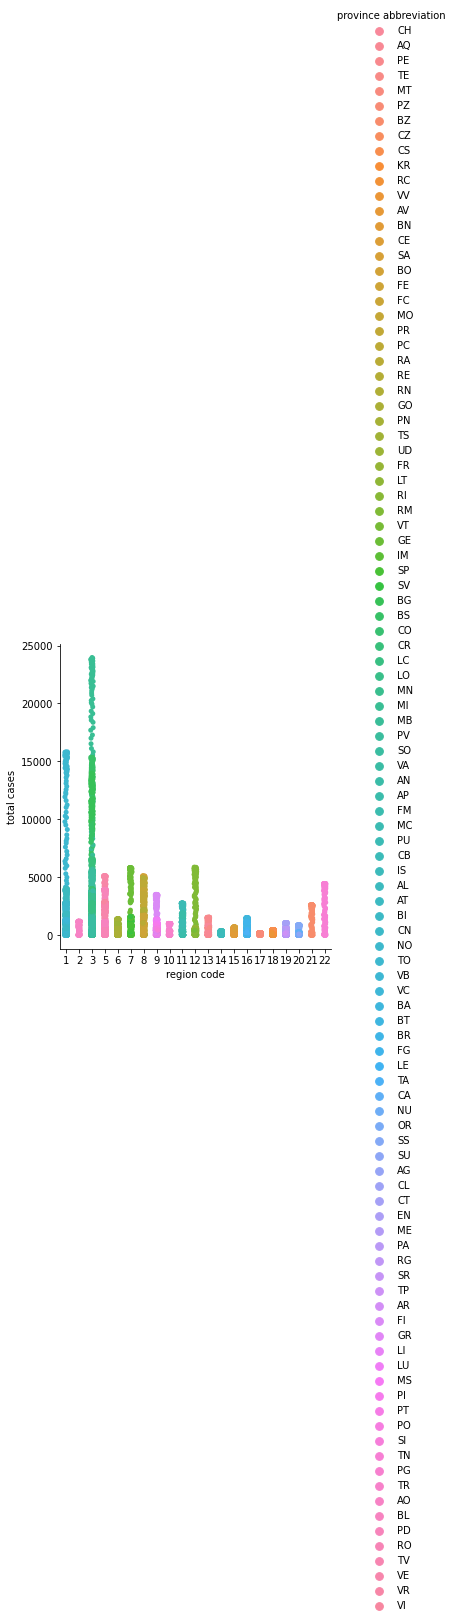

In [139]:
sns.catplot(x="region code", y="total cases", hue = "province abbreviation", data=province_df)
plt.show()

## Violin Plot using seaborn
We can also represent the above variables differently by using violin plots. Let’s try it out

In [152]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

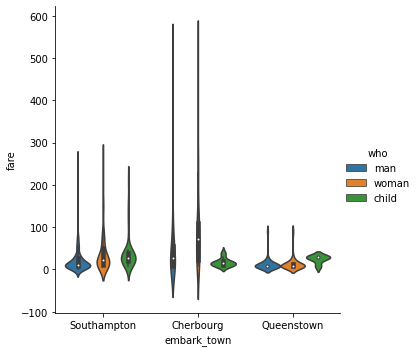

In [156]:
sns.catplot(x="embark_town", y="fare", hue = "who", kind = "violin", data=titanic)
plt.show()

The violin plots combine the boxplot and kernel density estimation procedure to provide richer description of the distribution of values. The quartile values are displayed inside the violin. We can also split the violin when the hue semantic parameter has only two levels, which could also be helpful in saving space on the plot. Let’s look at the violin plot with a split of levels.

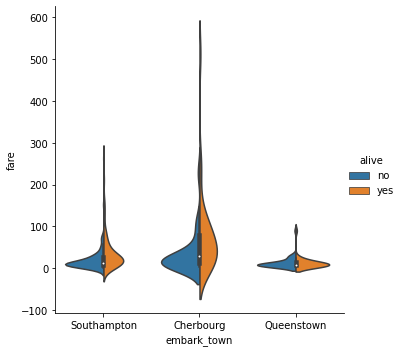

In [159]:
sns.catplot(x="embark_town", y="fare", hue = "alive", kind = "violin", split = True, data=titanic)
plt.show()

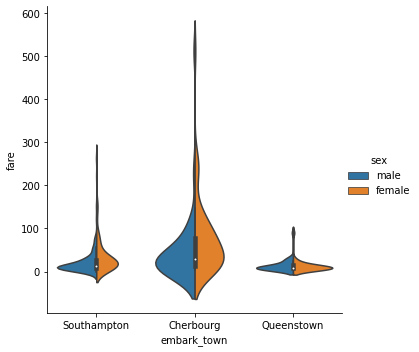

In [160]:
sns.catplot(x="embark_town", y="fare", hue = "sex", kind = "violin", split = True, data=titanic)
plt.show()

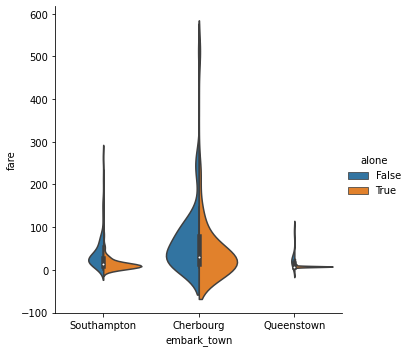

In [161]:
sns.catplot(x="embark_town", y="fare", hue = "alone", kind = "violin", split = True, data=titanic)
plt.show()

## Swarm plot
Using swarm plot we can visualize higher dimension relationships

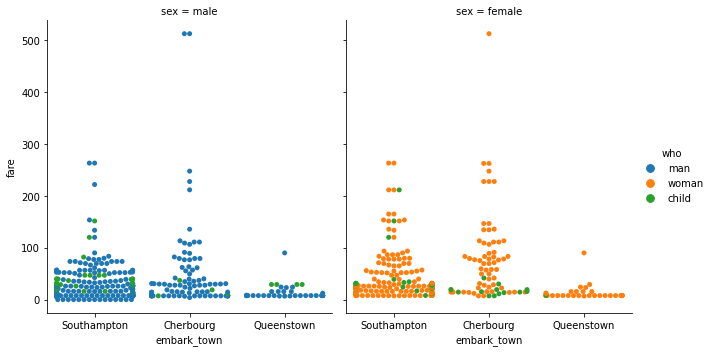

In [164]:
sns.catplot(x="embark_town", y="fare", hue="who",
            col="sex", aspect=.9,
            kind="swarm", data=titanic)
plt.show()

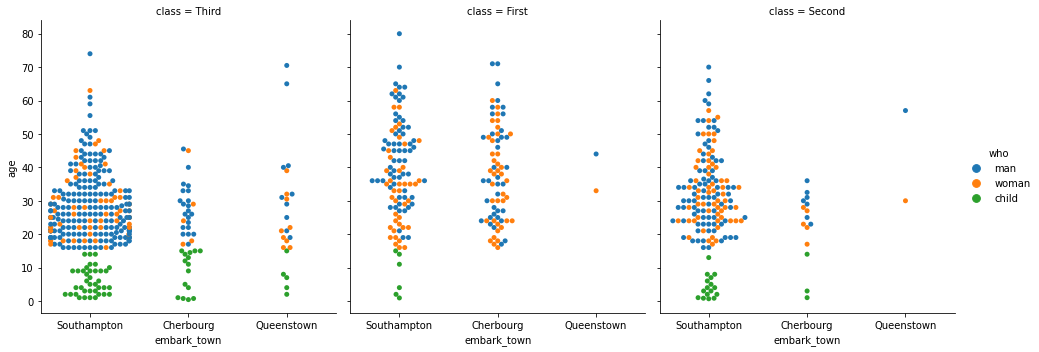

In [168]:
sns.catplot(x="embark_town", y="age", hue="who",
            col="class", aspect=.9,
            kind="swarm", data=titanic)
plt.show()

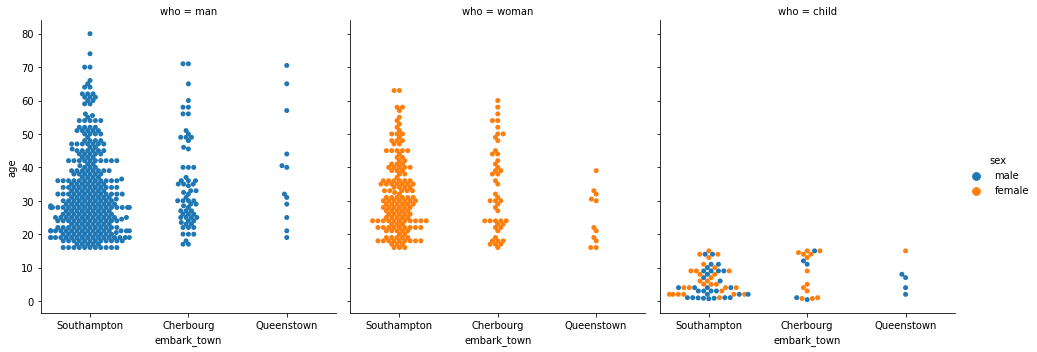

In [166]:
sns.catplot(x="embark_town", y="age", hue="sex",
            col="who", aspect=.9,
            kind="swarm", data=titanic)
plt.show()

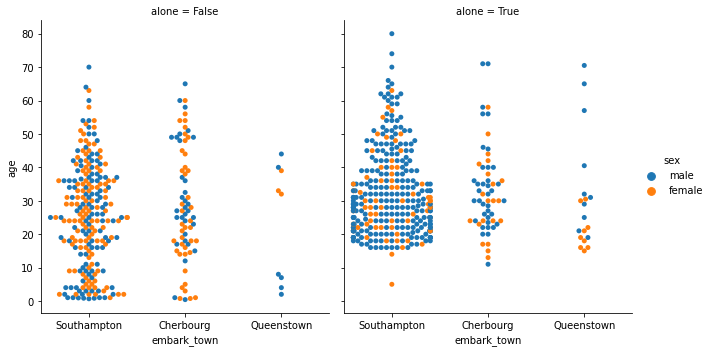

In [167]:
sns.catplot(x="embark_town", y="age", hue="sex",
            col="alone", aspect=.9,
            kind="swarm", data=titanic)
plt.show()

# Barplot using seaborn

Barplot operates on the full dataset and obtains the mean value by default.


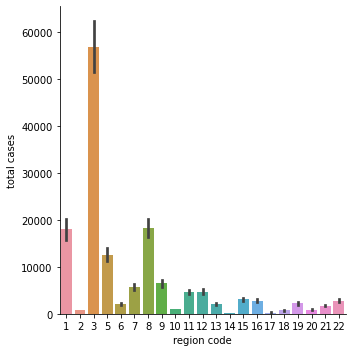

In [93]:
sns.catplot(x="region code", y="total cases", kind = "bar", data = regions_df)
plt.show()

## Visualizing the Distribution of a Dataset 

Whenever we are dealing with a dataset, we want to know how the data or the variables are being distributed. 

Distribution of data could tell us a lot about the nature of the data

### Plotting Univariate Distributions

One of the most common plots you’ll come across while examining the distribution of a variable is distplot. 

By default, distplot() function draws histogram and fits a Kernel Density Estimate. 

In [117]:
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv") 

In [118]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


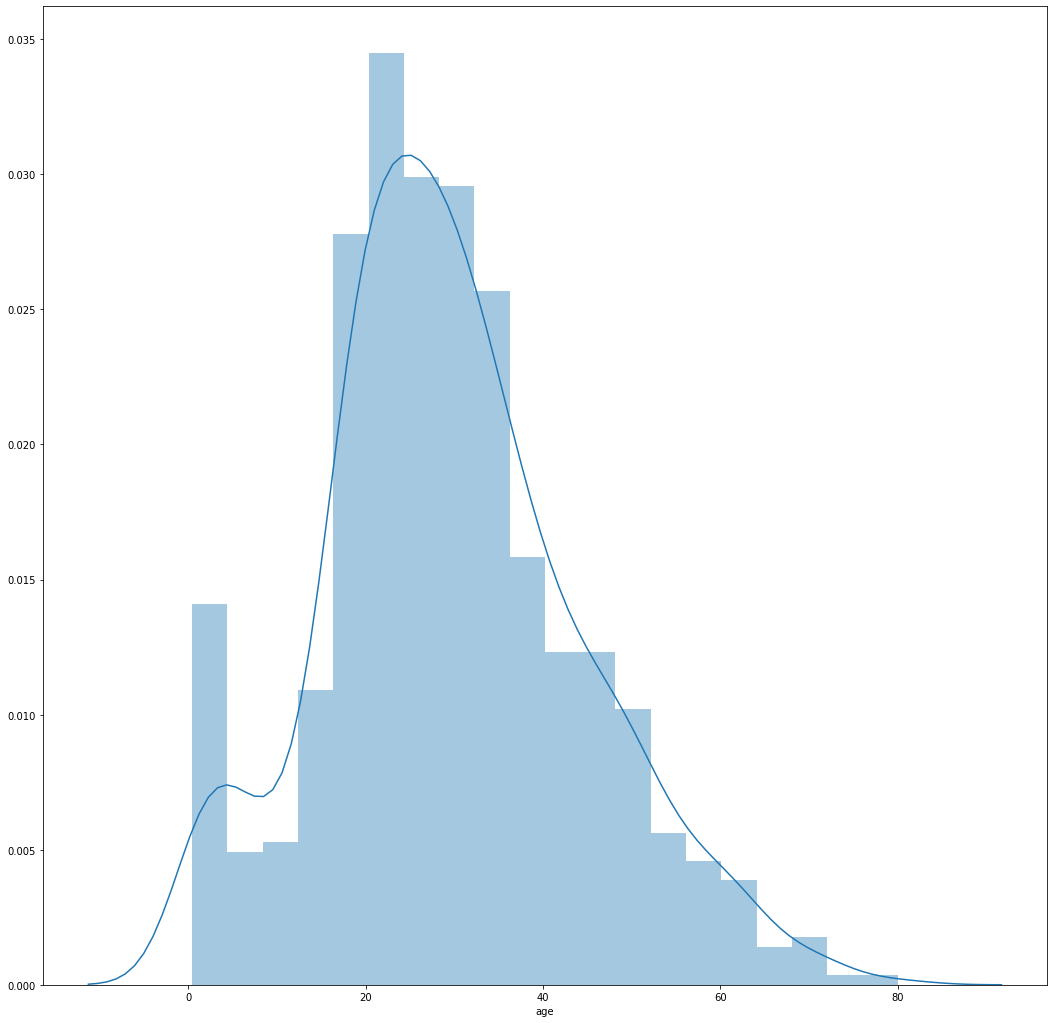

In [119]:
sns.distplot(titanic['age'])
plt.show()

This clearly shows that the majority of people are in their late twenties and early thirties.

## Histogram using Seaborn 

Another kind of plot that we use for univariate distribution is a histogram. 

A histogram represents the distribution of data in the form of bins and uses bars to show the number of observations falling under each bin. 

We can also add a rugplot in it instead of using KDE (Kernel Density Estimate), which means at every observation, it will draw a small vertical stick.

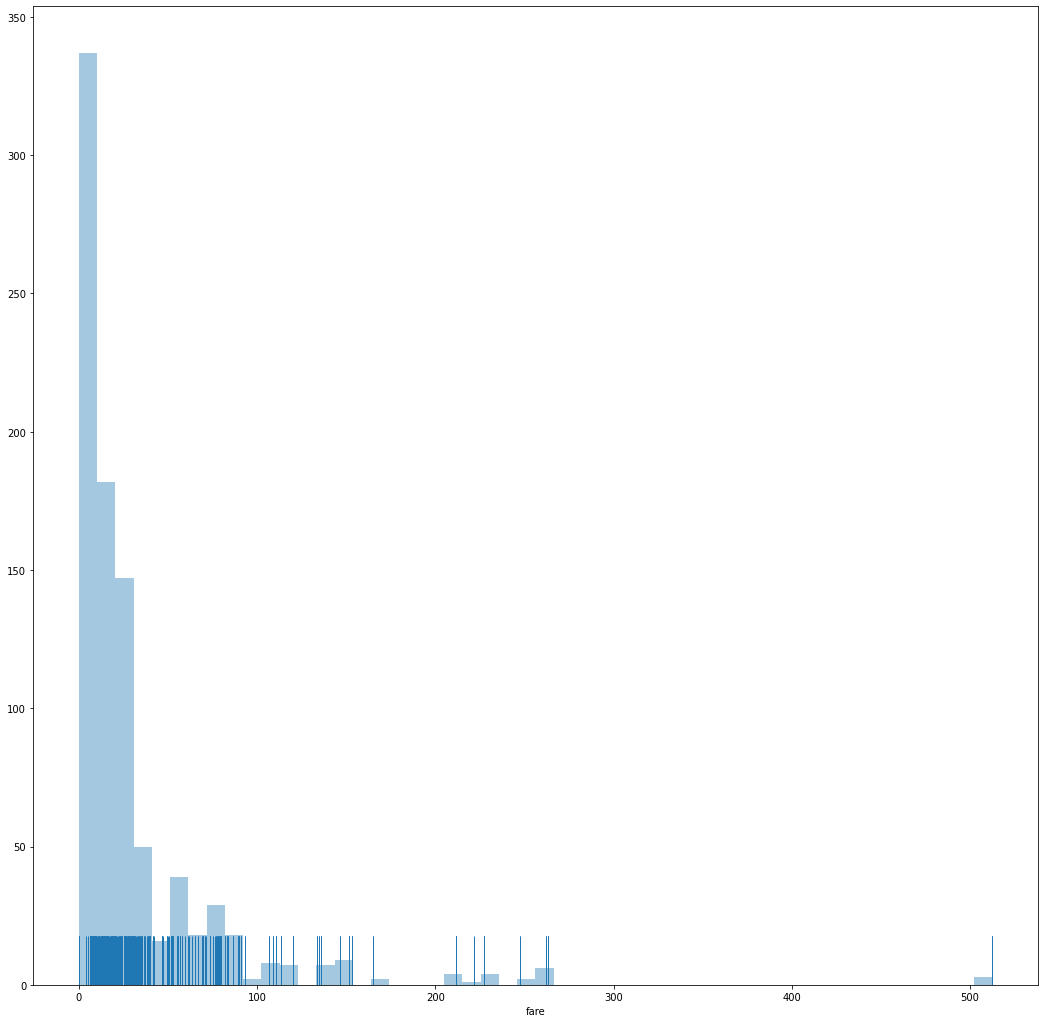

In [121]:
sns.distplot(titanic['fare'], kde=False, rug = True)
plt.show()

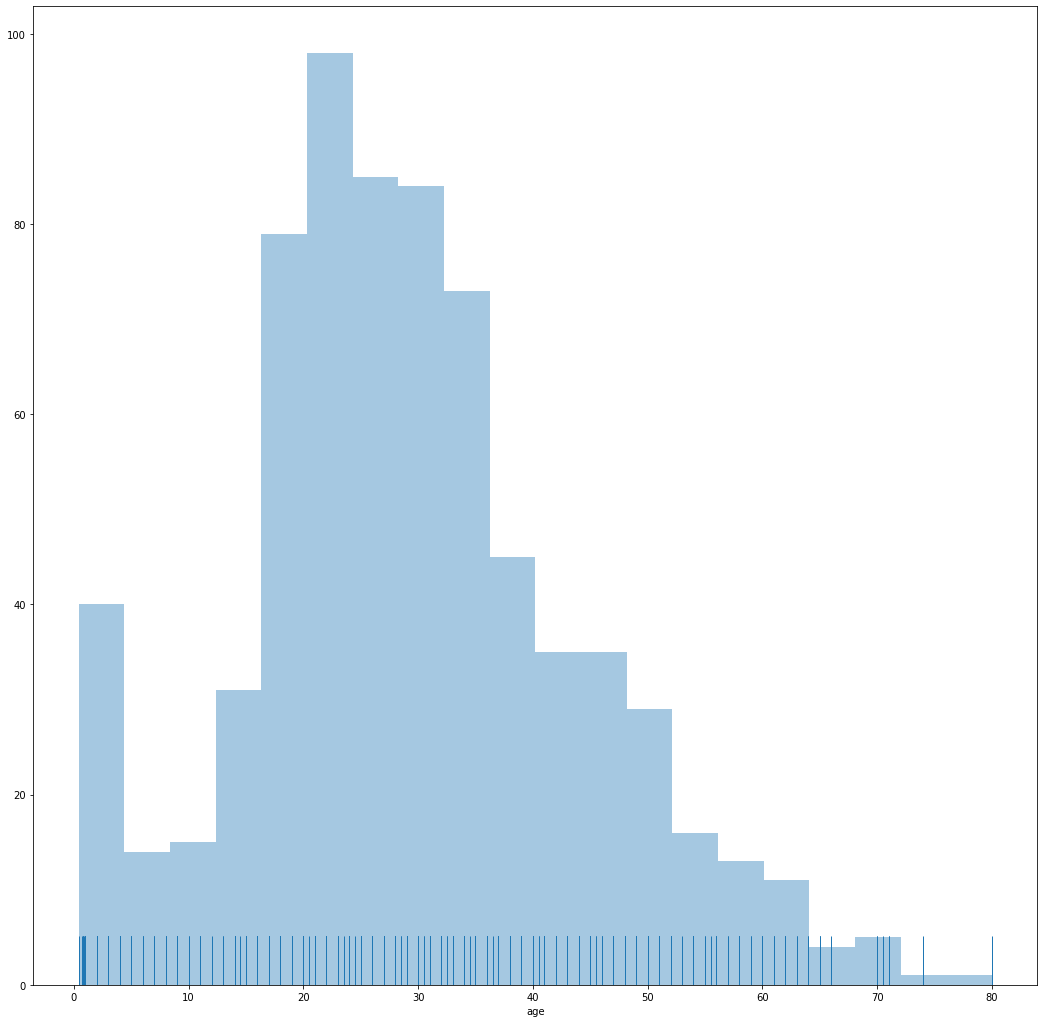

In [122]:
sns.distplot(titanic['age'], kde=False, rug = True)
plt.show()

## Plotting Bivariate Distributions 

Apart from visualizing the distribution of a single variable, we can see how two independent variables are distributed with respect to each other. 

Bivariate means joint, so to visualize it, we use jointplot() function of seaborn library. 

By default, jointplot draws a scatter plot. 

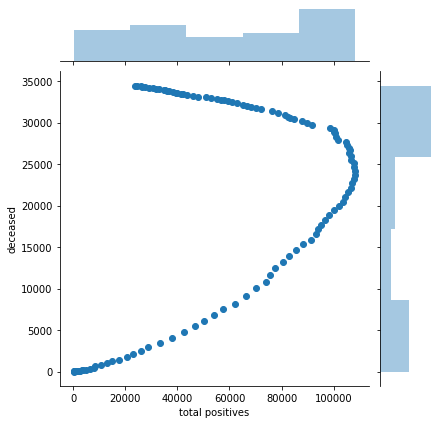

In [123]:
sns.jointplot(x="total positives", y="deceased", data=total_df);
plt.show()


## Hexplot using Seaborn 

Hexplot is a bivariate analog of histogram as it shows the number of observations that falls within hexagonal bins. 

This is a plot which works with large dataset very easily. 

To draw a hexplot, we’ll set kind attribute to hex. Let’s check it out now.

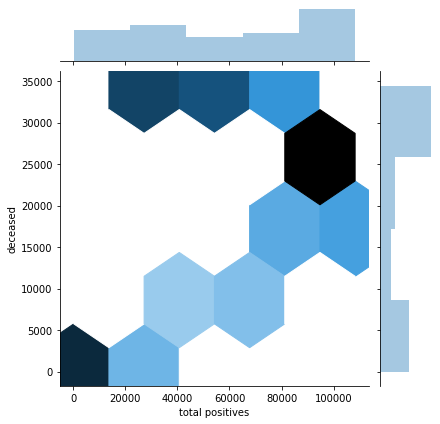

In [124]:
sns.jointplot(x="total positives", y="deceased", kind="hex", data=total_df)
plt.show()

## KDE Plot using Seaborn

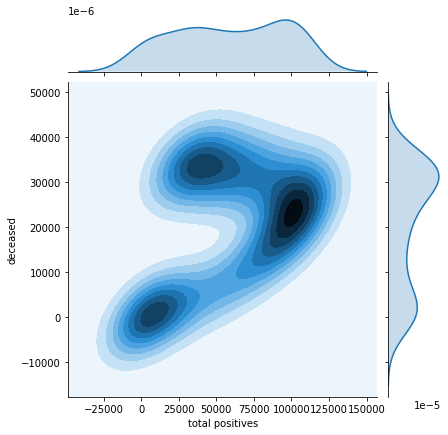

In [125]:
sns.jointplot(x="total positives", y="deceased", kind="kde", data=total_df)
plt.show()

### Heatmaps using Seaborn

Heatmaps are graphical representations in which each variable is represented as a color.

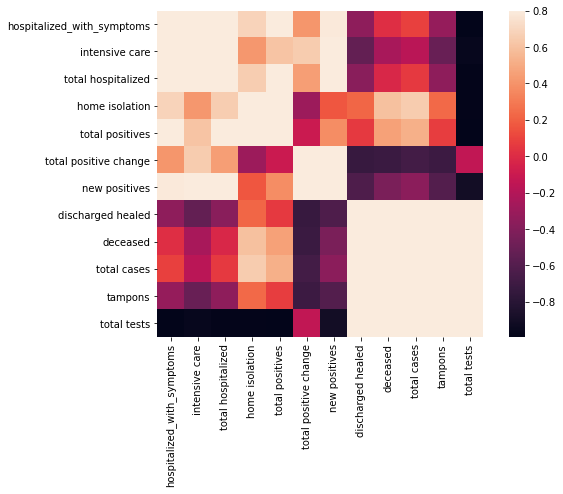

In [9]:
corrmat = total_df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Visualizing Pairwise Relationships in a Dataset

We can also plot multiple bivariate distributions in a dataset by using pairplot() function of the seaborn library. 

This shows the relationship between each column of the database. 

It also draws the univariate distribution plot of each variable on the diagonal axis. 


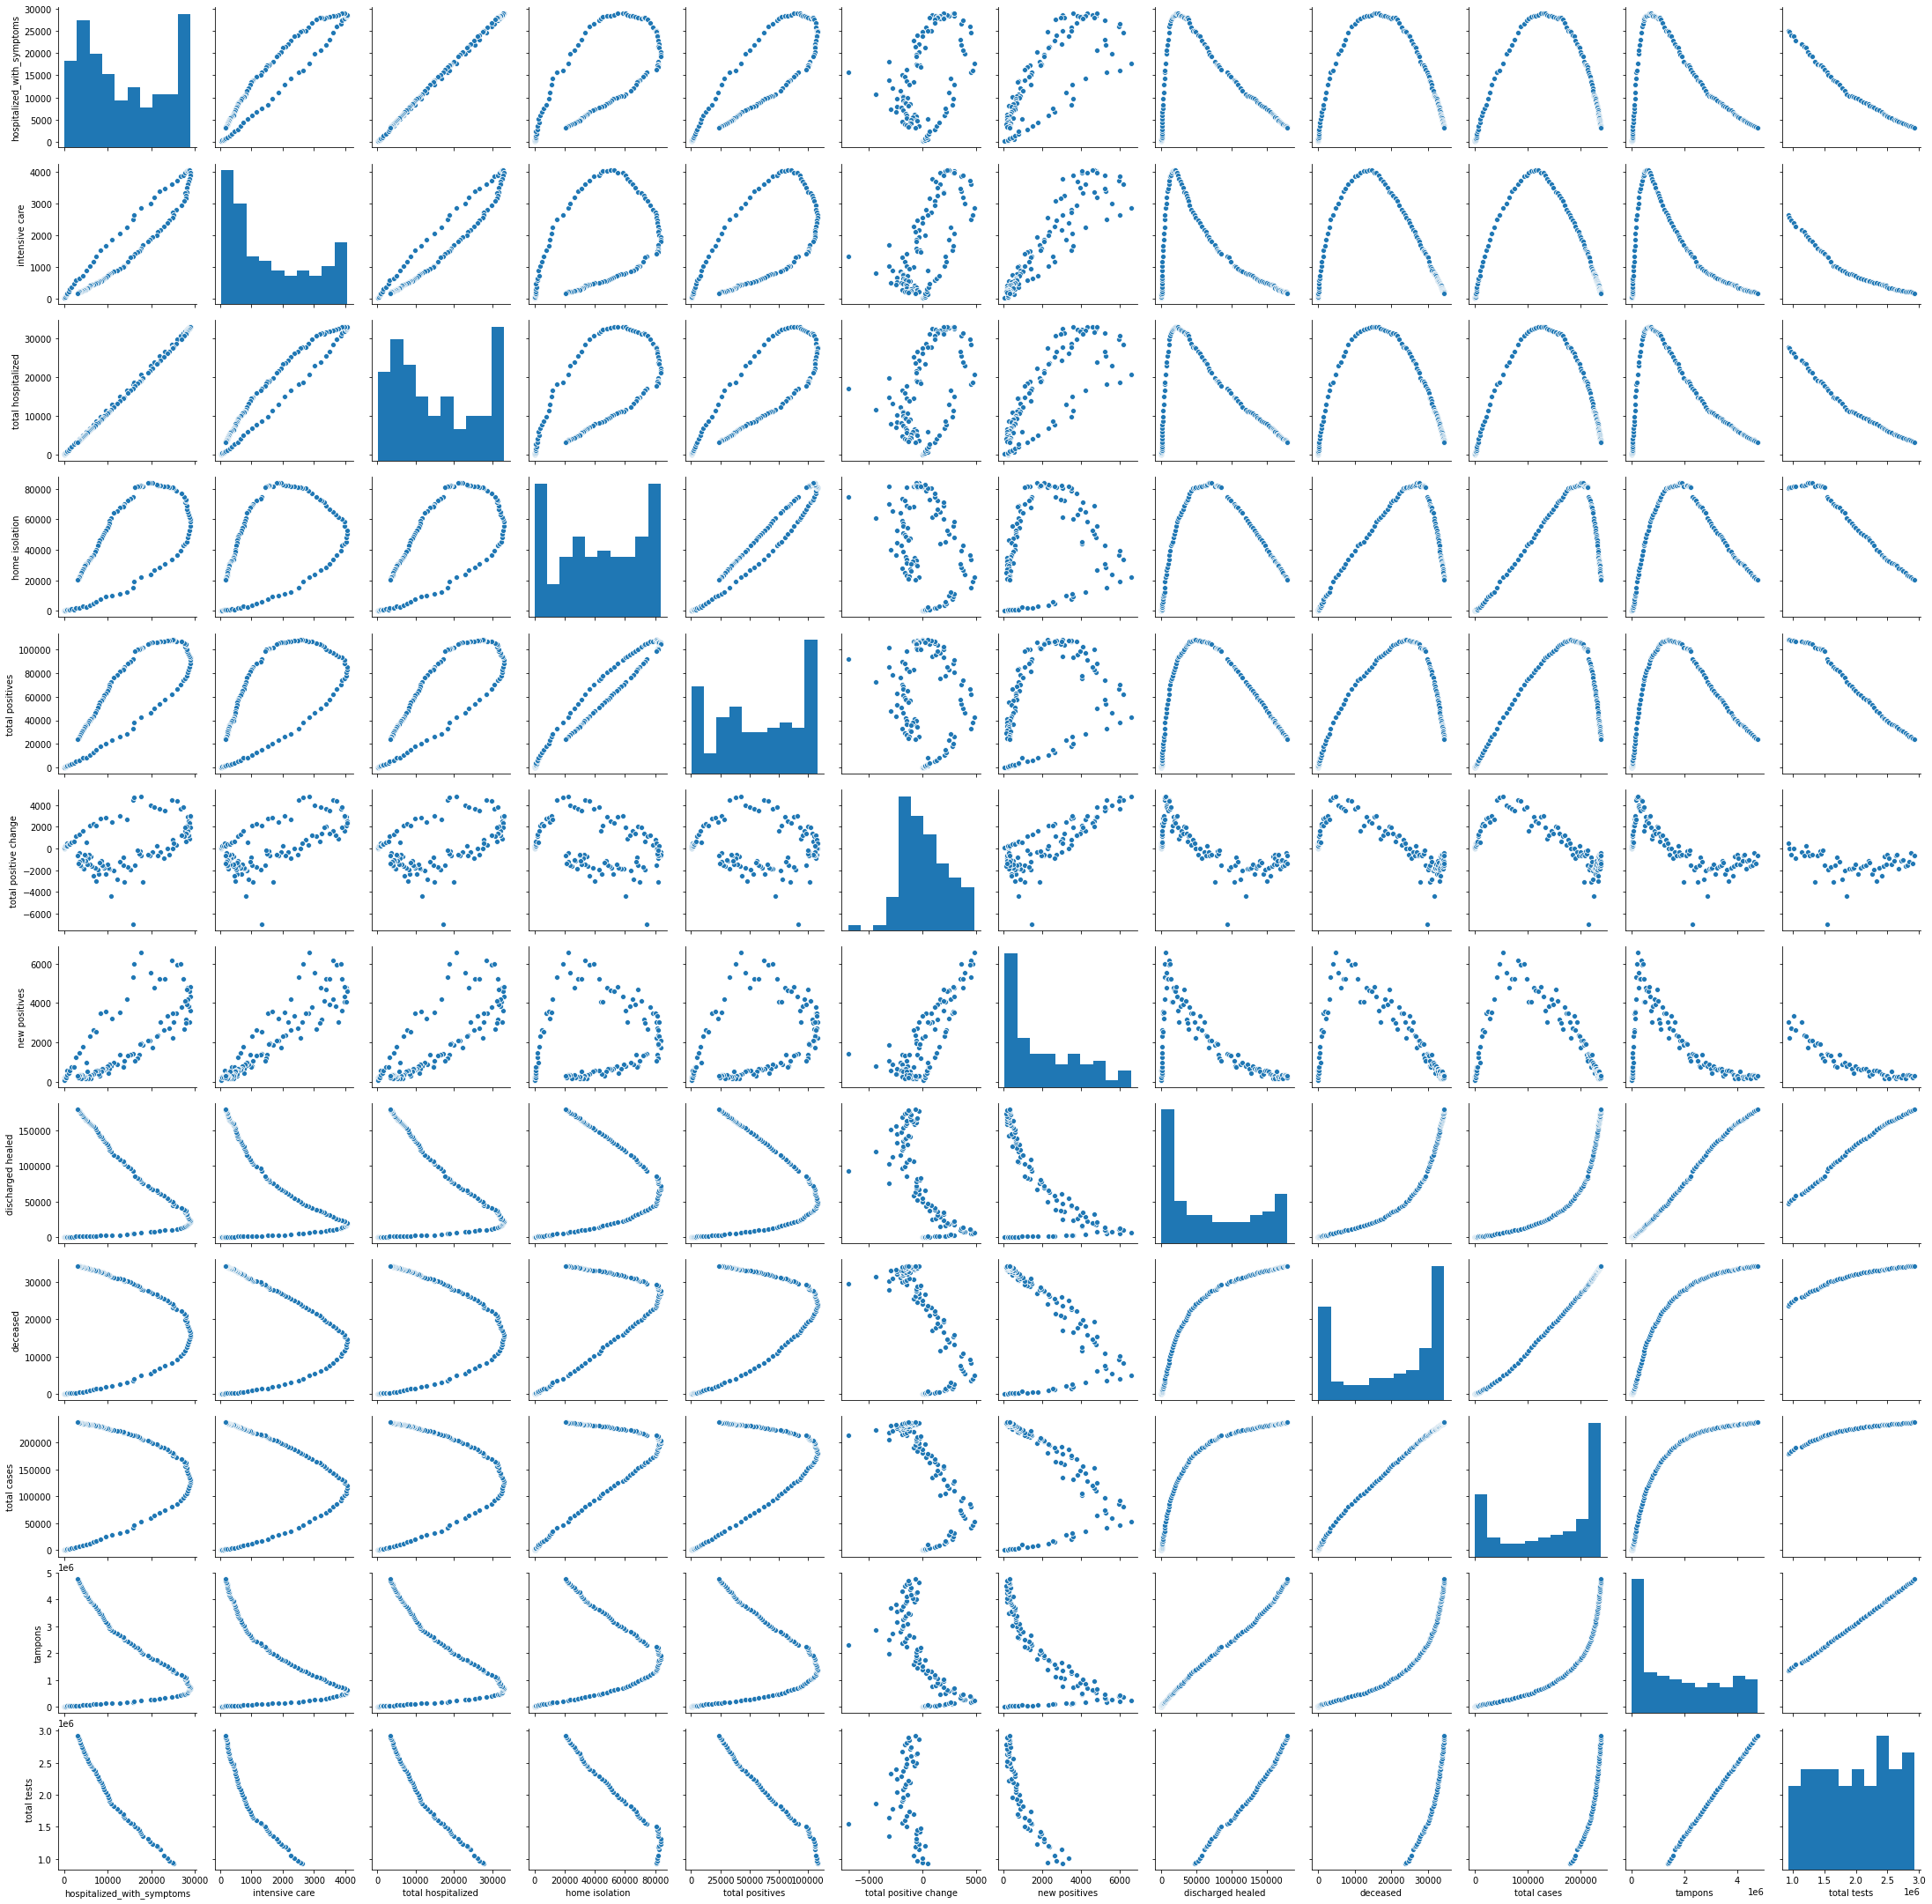

In [8]:
sns.pairplot(total_df)
plt.show()

### References
https://towardsdatascience.com/dynamic-subplot-layout-in-seaborn-e777500c7386
